In [1]:
using ControlSystems
using Plots

# plotly()

In [2]:
s = tf('s')

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Int64}}
s
-
1

Continuous-time transfer function model

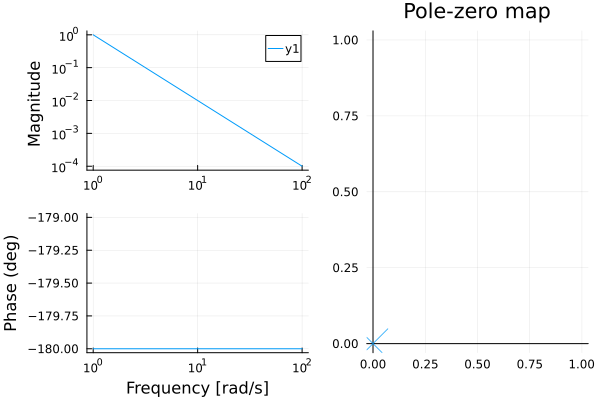

In [3]:
# Rotor Plant
P = 1 / s^2;

## Plotting
p1 = bodeplot(P)
p2 = pzmap(P)
plot(p1, p2)

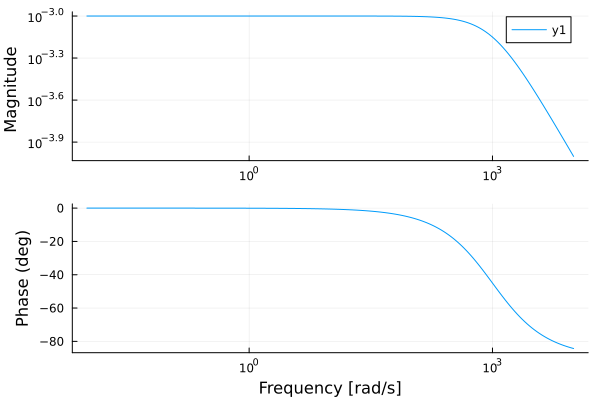

In [30]:
## High Pass Filter
Wcut = 1e3
# filter = 1 / (Tf^2/2*s^2+Tf*s+1);
filter = 1 / (s+Wcut);

ws = exp10.(range(-2,stop=4,length=200))
bodeplot(filter, ws)

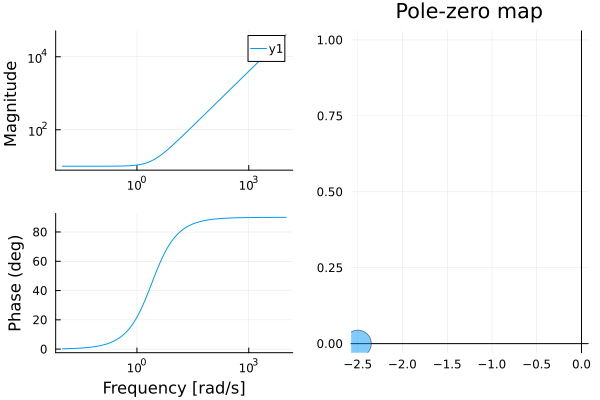

In [49]:
# PD Controller Plant

Ki = 0;#0.1;
Td = 0.4;
Kp = 10;
Kd = Td*Kp;

C = Kd*s + Kp + Ki/s;
# C = C*filter;

ws = exp10.(range(-2,stop=4,length=200))

## Plotting
p1 = bodeplot(C, ws)
p2 = pzmap(C)
plot(p1, p2)

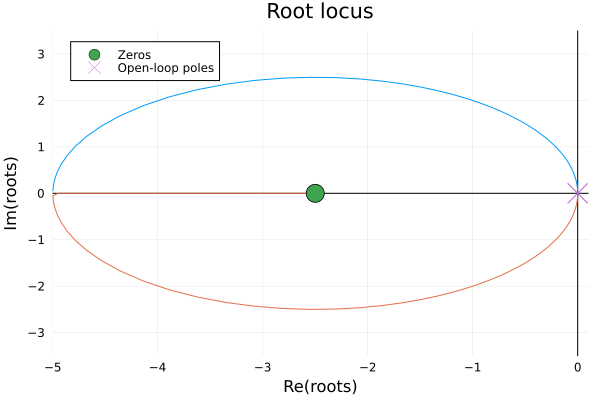

In [50]:
# Root Locus of the Feedback Transfer Function
rlocusplot(C*P, xlim=[-5,0.1])# ylim=[-0.5, 0.5])

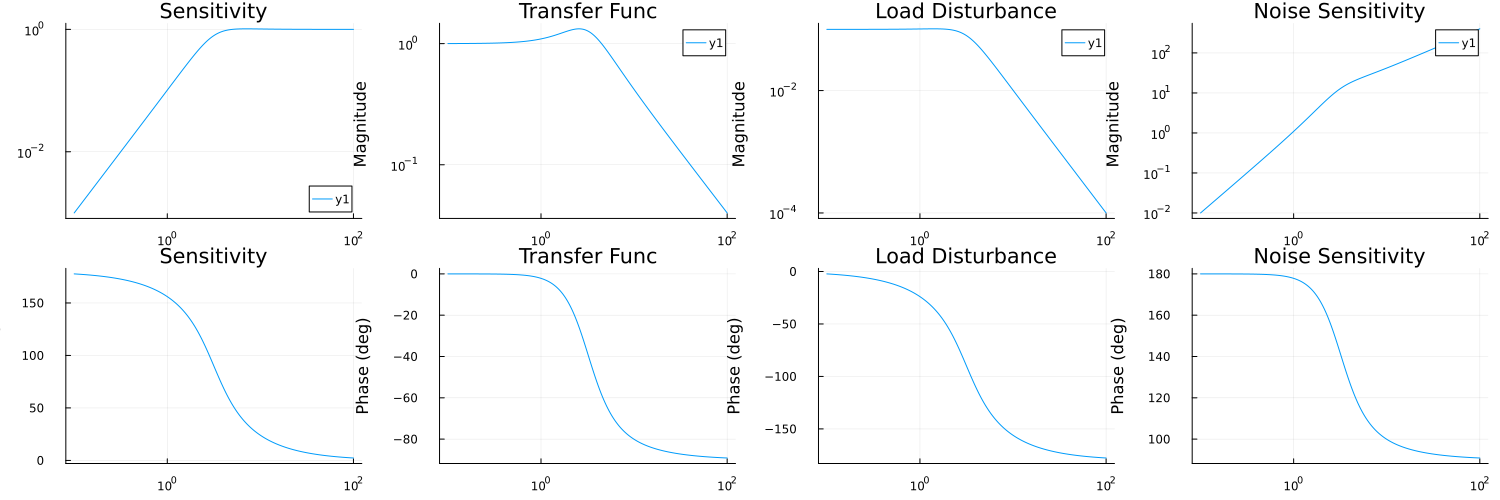

In [51]:
# Sensitivity Function
S = 1 / (1 + C*P)

# Complimentary Sensitivity Function
T = C * P * S

# Load Disturbance Sensitivity Function
PS = P * S

# Noise Sensitivity Function
CS = C * S


ws = exp10.(range(-1,stop=2,length=200))
## Plotting
p1 = bodeplot(S, ws, title="Sensitivity", grid=true)
p2 = bodeplot(T, ws, title="Transfer Func")
p3 = bodeplot(PS, ws, title="Load Disturbance")
p4 = bodeplot(CS, ws, title="Noise Sensitivity")
display(plot(p1, p2, p3, p4, layout=(1,4),size=(1500,500)))


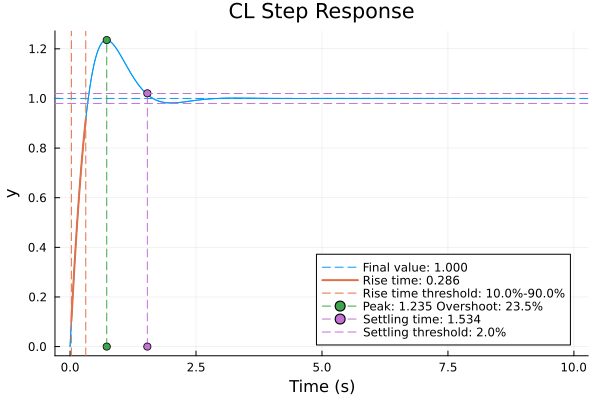

StepInfo:
Initial value:     0.000
Final value:       1.000
Step size:         1.000
Peak:              1.235
Peak time:         0.728 s
Overshoot:         23.53 %
Undershoot:         0.00 %
Settling time:     1.534 s
Rise time:         0.286 s


In [52]:
res = step(T,10)
plot(res, title="CL Step Response")
si = stepinfo(res)
display(plot!(si))
si

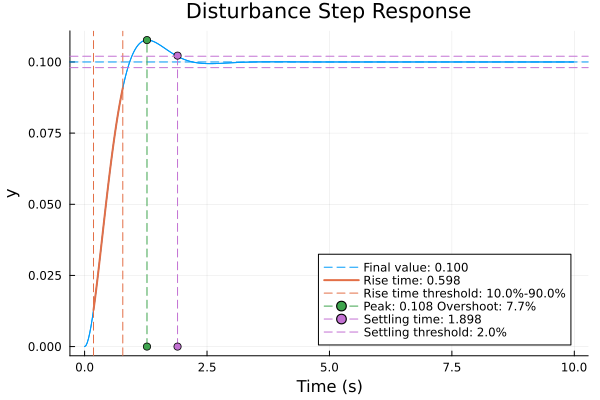

StepInfo:
Initial value:     0.000
Final value:       0.100
Step size:         0.100
Peak:              0.108
Peak time:         1.274 s
Overshoot:          7.69 %
Undershoot:         0.00 %
Settling time:     1.898 s
Rise time:         0.598 s


In [53]:
res = step(PS,10)
plot(res, title="Disturbance Step Response")
si = stepinfo(res)
display(plot!(si))
si

In [ ]:
# Complimentary Sensitivity Function
T = C * P * S

## Plotting
p1 = bodeplot(T,  exp10.(range(-1,stop=2,length=200)))
p2 = bodeplot(T, title="Complimentary Sensitivity")
display(plot(p1, p2))
T

In [ ]:
# Load Disturbance Sensitivity Function
PS = P * S

## Plotting
p1 = bodeplot(PS,  exp10.(range(-1,stop=2,length=200)))
p2 = pzmap(PS)
display(plot(p1, p2))
PS

In [ ]:
# Noise Sensitivity Function
CS = C * S

## Plotting
p1 = bodeplot(CS,  exp10.(range(-1,stop=2,length=200)))
p2 = pzmap(CS, title="Noise Sensitivity")
display(plot(p1, p2))
CS

In [ ]:
bodeplot(tf(1,[1,2,1]))

In [ ]:
S

In [ ]:
bodeplot(s)